In [1]:
from math import sqrt, floor, log10
from scipy.stats import beta
import pandas as pd

def jeffrey_interval(p_hat, n_samples):
    # beta.cdf
    m = p_hat*n_samples
    a = m + 0.5
    b = n_samples - m + 0.5
    theta_l = beta.ppf(0.025, a=a, b=b)
    theta_u = beta.ppf(0.975, a=a, b=b)
    mean = a/(a+b)
    radius = (theta_u-theta_l)/2.0
    #print(b)
    #return '$[{:.3f}\%, {:.3f}\%]$'.format(theta_l*100, theta_u*100)
    #return '${:.2f}\pm {:.3f}$'.format(mean*100, radius*100)
    return mean, radius


def formatted_jeffrey_interval(p_hat, n_samples):
    mean, radius = jeffrey_interval(p_hat, n_samples)
    mean, radius = mean*100, radius*100
    radius_decimals = -floor(log10(radius))
    mean_decimals = min(2, radius_decimals)
    mean = round(mean*10**mean_decimals)*10**-mean_decimals
    radius = round(radius*10**radius_decimals)*10**-radius_decimals
    return '${:.{:d}f} \pm {:.{:d}f}$'.format(mean, mean_decimals, radius, radius_decimals)

#################
## Table stuff ##
#################
val_top5 = 'Validation set top-5 categorical accuracy (\%)'
val_top1 = 'Validation set top-1 categorical accuracy (\%)'
val_ece = 'Validation set ECE'
val_mce = 'Validation set MCE'
prep_time = 'Preparation time (s)'
eval_time = 'Evaluation time (s)'

# Formatters
NA_REP = ' - '
to_latex_kwargs = {
    'na_rep': NA_REP,
    'escape': False,
    'index': True, 
    'column_format': 'lp{2cm}p{2cm}p{2cm}p{2cm}'
}

    
def highlight(df, ixs):
    new_df = df.copy()
    for ix in ixs:
        s = new_df[ix[0]][ix[1]]
        if not isinstance(s, str):
            s = str(s)
        if s[0] == '$' and s[-1] == '$':
            s = s[1:-1]
        s = '$\\mathbf{' + s + '}$'
        new_df[ix[0]][ix[1]] = s
    return new_df


def compute_conf_int(df, idxs, n_samples, model_titles):
    new_df = df.copy()
    for idx in idxs:
        new_df[idx] = pd.Series([formatted_jeffrey_interval(p_hat, n) for p_hat, n in zip(df[idx], n_samples)], index=model_titles)
    return new_df


def round_col(df, idxs, model_titles):
    new_df = df.copy()
    for idx in idxs:
        new_df[idx] = pd.Series(['{:.2f}'.format(i) for i in new_df[idx]], index=model_titles)
    return new_df

# CMPlaces

In [2]:
model_titles_cmplaces = pd.Series([
    "Uncalibrated BERT-768",
    "Uncalibrated VGG16",
    "Uncalibrated fusion",
    "Calibrated BERT-768",
    "Calibrated VGG16",
    "Calibrated fusion",
    "SVM",
    "Retrained fusion", #"Fine-tuned fusion model",
    "Recovered VGG16", #"Recovered (fine-tuned) VGG16 model",
    "Recovered BERT-768" #"Recovered (fine-tuned) BERT-768 model"
])

text_length = 2050
img_length = 20500

no_validation_samples_cmplaces = [
    text_length,
    img_length,
    text_length,
    text_length,
    img_length,
    text_length,
    text_length,
    text_length,
    img_length,
    text_length
]

data_cmplaces = [
    [{'hp_test_top_1_acc': 0.6824390292167664, 'hp_test_top_5_acc': 0.8780487775802612, 'hp_metric': 0.6824390292167664, 'hp_test_ece': 0.24861200153827667, 'hp_test_mce': 0.5093136429786682}],
    [{'hp_test_top_1_acc': 0.5833658576011658, 'hp_test_top_5_acc': 0.8660487532615662, 'hp_metric': 0.5833658576011658, 'hp_test_ece': 0.028693009167909622, 'hp_test_mce': 0.06788046658039093}],
    [{'hp_test_top_1_acc': 0.7727804780006409, 'hp_test_top_5_acc': 0.9237561225891113, 'hp_metric': 0.7727804780006409, 'hp_test_ece': 0.18535178899765015, 'hp_test_mce': 0.47309941053390503}],
    [{'hp_test_top_1_acc': 0.6824390292167664, 'hp_test_top_5_acc': 0.8780487775802612, 'hp_metric': 0.6824390292167664, 'hp_test_ece': 0.06209973618388176, 'hp_test_mce': 0.13781219720840454}],
    [{'hp_test_top_1_acc': 0.5833658576011658, 'hp_test_top_5_acc': 0.8660487532615662, 'hp_metric': 0.5833658576011658, 'hp_test_ece': 0.02010679990053177, 'hp_test_mce': 0.05972212553024292}],
    [{'hp_test_top_1_acc': 0.818195104598999, 'hp_test_top_5_acc': 0.9668780565261841, 'hp_metric': 0.818195104598999, 'hp_test_ece': 0.05484504625201225, 'hp_test_mce': 0.1228029876947403}],
    [{'hp_test_top_1_acc': 0.7832682728767395, 'hp_test_top_5_acc': 0.943707287311554, 'hp_metric': 0.7832682728767395, 'hp_test_ece': 0.10589589178562164, 'hp_test_mce': 0.20090556144714355}],
    [{'hp_test_top_1_acc': 0.8058536648750305, 'hp_test_top_5_acc': 0.9377561211585999, 'hp_metric': 0.8058536648750305, 'hp_test_ece': 0.09878294169902802, 'hp_test_mce': 0.23268026113510132}],
    [{'hp_test_top_1_acc': 0.529073178768158, 'hp_test_top_5_acc': 0.8237073421478271, 'hp_metric': 0.529073178768158, 'hp_test_ece': 0.11309865117073059, 'hp_test_mce': 0.19754117727279663}],
    [{'hp_test_top_1_acc': 0.5717073082923889, 'hp_test_top_5_acc': 0.8219512104988098, 'hp_metric': 0.5717073082923889, 'hp_test_ece': 0.1227727085351944, 'hp_test_mce': 0.2384229302406311}],
]

x = -1
times_cmplaces = [
    (0,8.56),
    (0,71.27),
    (119.09,70.94),
    (15.34,6.40),
    (180.98, 57.50),
    (292.29,68.27),
    (22299.07,70.72),
    (49240.10,123.09),
    (0,57.90),
    (0,6.56)
]


df = pd.DataFrame({
        val_top5: pd.Series([d[0]['hp_test_top_5_acc'] for d in data_cmplaces]),
        val_top1: pd.Series([d[0]['hp_test_top_1_acc'] for d in data_cmplaces]),
        val_ece: pd.Series([d[0]['hp_test_ece'] for d in data_cmplaces])*100,
        val_mce: pd.Series([d[0]['hp_test_mce'] for d in data_cmplaces])*100,
        #prep_time: pd.Series([d[0] for d in times_cmplaces]),
        #eval_time: pd.Series([d[1] for d in times_cmplaces]),
    },
).set_index(model_titles_cmplaces)

    
#############################
### Compute uncertainties ###
#############################
highlighted_elements = [
    (val_top1, df[val_top1].idxmax()),
    (val_top5, df[val_top5].idxmax()),
    (val_mce, df[val_mce].idxmin()),
    (val_ece, df[val_ece].idxmin())
]

cmplaces = df.copy().iloc[[0,1,2,3,4,5,6,7,9,8],:]
cmplaces = round_col(cmplaces, [val_mce, val_ece], model_titles_cmplaces)
cmplaces = compute_conf_int(cmplaces, [val_top1, val_top5], no_validation_samples_cmplaces, model_titles_cmplaces)
cmplaces = highlight(cmplaces, highlighted_elements)
print(cmplaces.to_latex(**to_latex_kwargs))

\begin{tabular}{lp{2cm}p{2cm}p{2cm}p{2cm}}
\toprule
{} & Validation set top-5 categorical accuracy (\%) & Validation set top-1 categorical accuracy (\%) & Validation set ECE & Validation set MCE \\
\midrule
Uncalibrated BERT-768 &                                     $88 \pm 1$ &                                     $68 \pm 2$ &              24.86 &              50.93 \\
Uncalibrated VGG16    &                                 $86.6 \pm 0.5$ &                                 $58.3 \pm 0.7$ &               2.87 &               6.79 \\
Uncalibrated fusion   &                                     $92 \pm 1$ &                                     $77 \pm 2$ &              18.54 &              47.31 \\
Calibrated BERT-768   &                                     $88 \pm 1$ &                                     $68 \pm 2$ &               6.21 &              13.78 \\
Calibrated VGG16      &                                 $86.6 \pm 0.5$ &                                 $58.3 \pm 0.7$ &    $\mathbf

/tmp/pbs.201213.hnode41/ipykernel_2877/1289903434.py:83: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cmplaces.to_latex(**to_latex_kwargs))


In [3]:
cmplaces

,Validation set top-5 categorical accuracy (\%),Validation set top-1 categorical accuracy (\%),Validation set ECE,Validation set MCE
Uncalibrated BERT-768,$88 \pm 1$,$68 \pm 2$,24.86,50.93
Uncalibrated VGG16,$86.6 \pm 0.5$,$58.3 \pm 0.7$,2.87,6.79
Uncalibrated fusion,$92 \pm 1$,$77 \pm 2$,18.54,47.31
Calibrated BERT-768,$88 \pm 1$,$68 \pm 2$,6.21,13.78
Calibrated VGG16,$86.6 \pm 0.5$,$58.3 \pm 0.7$,$\mathbf{2.01}$,$\mathbf{5.97}$
Calibrated fusion,$\mathbf{96.7 \pm 0.8}$,$\mathbf{82 \pm 2}$,5.48,12.28
SVM,$94.3 \pm 1.0$,$78 \pm 2$,10.59,20.09
Retrained fusion,$94 \pm 1$,$81 \pm 2$,9.88,23.27
Recovered BERT-768,$82 \pm 2$,$53 \pm 2$,11.31,19.75
Recovered VGG16,$82.2 \pm 0.5$,$57.2 \pm 0.7$,12.28,23.84


# ImageNet

In [4]:
import pandas as pd

model_titles_imagenet = pd.Series([
    "Uncalibrated BERT-1024",
    "Uncalibrated ResNet50",
    "Uncalibrated fusion",
    "Calibrated BERT-1024",
    "Calibrated ResNet50",
    "Calibrated fusion",
    "SVM",
    "Retrained fusion", #"Fine-tuned fusion model",
    "Recovered ResNet50", #"Recovered (fine-tuned) ResNet50 model",
    "Recovered BERT-1024", #"Recovered (fine-tuned) BERT-1024 model"
])

text_length = 1708
img_length = 49550

no_validation_samples_imagenet = [
    text_length,
    img_length,
    text_length,
    text_length,
    img_length,
    text_length,
    text_length,
    text_length,
    img_length,
    text_length
]

data_imagenet = [
    [{'hp_test_top_1_acc': 0.3606557250022888, 'hp_test_top_5_acc': 0.544496476650238, 'hp_metric': 0.3606557250022888, 'hp_test_ece': 0.5118756890296936, 'hp_test_mce': 0.7572637796401978}],
    [{'hp_test_top_1_acc': 0.8105146288871765, 'hp_test_top_5_acc': 0.9546316862106323, 'hp_metric': 0.8105146288871765, 'hp_test_ece': 0.5345755815505981, 'hp_test_mce': 0.6294751167297363}],
    [{'hp_test_top_1_acc': 0.42801210284233093, 'hp_test_top_5_acc': 0.580524742603302, 'hp_metric': 0.42801210284233093, 'hp_test_ece': 0.4580068290233612, 'hp_test_mce': 0.6788085699081421}],
    [{'hp_test_top_1_acc': 0.3606557250022888, 'hp_test_top_5_acc': 0.544496476650238, 'hp_metric': 0.3606557250022888, 'hp_test_ece': 0.04875906556844711, 'hp_test_mce': 0.19074290990829468}],
    [{'hp_test_top_1_acc': 0.8105146288871765, 'hp_test_top_5_acc': 0.9546316862106323, 'hp_metric': 0.8105146288871765, 'hp_test_ece': 0.029739366844296455, 'hp_test_mce': 0.2733933627605438}],
    [{'hp_test_top_1_acc': 0.8284964561462402, 'hp_test_top_5_acc': 0.9695661067962646, 'hp_metric': 0.8284964561462402, 'hp_test_ece': 0.06458182632923126, 'hp_test_mce': 0.13831645250320435}],
    [{'hp_test_top_1_acc': 0.8767709136009216, 'hp_test_top_5_acc': 0.9775983691215515, 'hp_metric': 0.8767709136009216, 'hp_test_ece': 0.08128587901592255, 'hp_test_mce': 0.1551409363746643}],
    [{'hp_test_top_1_acc': 0.7375782132148743, 'hp_test_top_5_acc': 0.9098082780838013, 'hp_metric': 0.7375782132148743, 'hp_test_ece': 0.02871578373014927, 'hp_test_mce': 0.12602867186069489}],
    [{'hp_test_top_1_acc': 0.4134611487388611, 'hp_test_top_5_acc': 0.48149344325065613, 'hp_metric': 0.4134611487388611, 'hp_test_ece': 0.18126027286052704, 'hp_test_mce': 0.5276947021484375}],
    [{'hp_test_top_1_acc': 0.31323185563087463, 'hp_test_top_5_acc': 0.49531614780426025, 'hp_metric': 0.31323185563087463, 'hp_test_ece': 0.07353293895721436, 'hp_test_mce': 0.17472481727600098}],
]

x = -1  # Missing
times_imagenet = [
    (0,7.14),
    (0,221.63),
    (496.62, 204.37),
    (17.08, 7.27),
    (623.41,205.97),
    (1137.62,205.08),
    (54933.95,187.59),
    (36645.48,492.05),
    (0,331.78),
    (0,7.63)
]

df = pd.DataFrame({
        val_top5: pd.Series([d[0]['hp_test_top_5_acc'] for d in data_imagenet]),
        val_top1: pd.Series([d[0]['hp_test_top_1_acc'] for d in data_imagenet]),
        val_ece: pd.Series([d[0]['hp_test_ece'] for d in data_imagenet])*100,
        val_mce: pd.Series([d[0]['hp_test_mce'] for d in data_imagenet])*100,
        #prep_time: pd.Series([d[0] for d in times_imagenet]),
        #eval_time: pd.Series([d[1] for d in times_imagenet]),
    },
).set_index(model_titles_imagenet)
           
    
#############################
### Compute uncertainties ###
#############################

highlighted_elements = [
    (val_top1, df[val_top1].idxmax()),
    (val_top5, df[val_top5].idxmax()),
    (val_mce, df[val_mce].idxmin()),
    (val_ece, df[val_ece].idxmin())
]

imagenet = df.copy().iloc[[0,1,2,3,4,5,6,7,9,8],:]
imagenet = round_col(imagenet, [val_mce, val_ece], model_titles_imagenet)
imagenet = compute_conf_int(imagenet, [val_top1, val_top5], no_validation_samples_imagenet, model_titles_imagenet)
imagenet = highlight(imagenet, highlighted_elements)
print(imagenet.to_latex(**to_latex_kwargs))

\begin{tabular}{lp{2cm}p{2cm}p{2cm}p{2cm}}
\toprule
{} & Validation set top-5 categorical accuracy (\%) & Validation set top-1 categorical accuracy (\%) & Validation set ECE & Validation set MCE \\
\midrule
Uncalibrated BERT-1024 &                                     $54 \pm 2$ &                                     $36 \pm 2$ &              51.19 &              75.73 \\
Uncalibrated ResNet50  &                                 $95.5 \pm 0.2$ &                                 $81.1 \pm 0.3$ &              53.46 &              62.95 \\
Uncalibrated fusion    &                                     $58 \pm 2$ &                                     $43 \pm 2$ &              45.80 &              67.88 \\
Calibrated BERT-1024   &                                     $54 \pm 2$ &                                     $36 \pm 2$ &               4.88 &              19.07 \\
Calibrated ResNet50    &                                 $95.5 \pm 0.2$ &                                 $81.1 \pm 0.3$ &       

/tmp/pbs.201213.hnode41/ipykernel_2877/200907404.py:85: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(imagenet.to_latex(**to_latex_kwargs))


In [5]:
imagenet

,Validation set top-5 categorical accuracy (\%),Validation set top-1 categorical accuracy (\%),Validation set ECE,Validation set MCE
Uncalibrated BERT-1024,$54 \pm 2$,$36 \pm 2$,51.19,75.73
Uncalibrated ResNet50,$95.5 \pm 0.2$,$81.1 \pm 0.3$,53.46,62.95
Uncalibrated fusion,$58 \pm 2$,$43 \pm 2$,45.80,67.88
Calibrated BERT-1024,$54 \pm 2$,$36 \pm 2$,4.88,19.07
Calibrated ResNet50,$95.5 \pm 0.2$,$81.1 \pm 0.3$,2.97,27.34
Calibrated fusion,$96.9 \pm 0.8$,$83 \pm 2$,6.46,13.83
SVM,$\mathbf{97.7 \pm 0.7}$,$\mathbf{88 \pm 2}$,8.13,15.51
Retrained fusion,$91 \pm 1$,$74 \pm 2$,$\mathbf{2.87}$,$\mathbf{12.60}$
Recovered BERT-1024,$48 \pm 2$,$41 \pm 2$,18.13,52.77
Recovered ResNet50,$49.5 \pm 0.4$,$31.3 \pm 0.4$,7.35,17.47


# Times

In [6]:
import numpy as np
cols = pd.MultiIndex.from_product([['CMPlaces', 'ImageNet'], [prep_time, eval_time]])
model_titles = pd.Series([
    "Uncalibrated BERT-(768/1024)",
    "Uncalibrated VGG16/ResNet50",
    "Uncalibrated fusion",
    "Calibrated BERT-(768/1024)",
    "Calibrated VGG16/ResNet50",
    "Calibrated fusion",
    "SVM",
    "Retrained fusion", #"Fine-tuned fusion model",
    "Recovered VGG16/ResNet50", #"Recovered (fine-tuned) ResNet50 model",
    "Recovered BERT-(768/1024)", #"Recovered (fine-tuned) BERT-1024 model"
])
df = pd.DataFrame(np.array([[d[0] for d in times_cmplaces],
                   [d[1] for d in times_cmplaces],
                   [d[0] for d in times_imagenet],
                   [d[1] for d in times_imagenet]
                  ]).T, columns=cols, index=model_titles)
times = df.copy().iloc[[0,1,2,3,4,5,6,7,9,8],:]
to_latex_kwargs = {
    'na_rep': NA_REP,
    'escape': False,
    'index': True, 
    'column_format': 'lp{1.75cm}p{1.75cm}p{1.75cm}p{1.75cm}'
}
print(times.to_latex(**to_latex_kwargs))
times

\begin{tabular}{lp{1.75cm}p{1.75cm}p{1.75cm}p{1.75cm}}
\toprule
{} & \multicolumn{2}{l}{CMPlaces} & \multicolumn{2}{l}{ImageNet} \\
{} & Preparation time (s) & Evaluation time (s) & Preparation time (s) & Evaluation time (s) \\
\midrule
Uncalibrated BERT-(768/1024) &                 0.00 &                8.56 &                 0.00 &                7.14 \\
Uncalibrated VGG16/ResNet50  &                 0.00 &               71.27 &                 0.00 &              221.63 \\
Uncalibrated fusion          &               119.09 &               70.94 &               496.62 &              204.37 \\
Calibrated BERT-(768/1024)   &                15.34 &                6.40 &                17.08 &                7.27 \\
Calibrated VGG16/ResNet50    &               180.98 &               57.50 &               623.41 &              205.97 \\
Calibrated fusion            &               292.29 &               68.27 &              1137.62 &              205.08 \\
SVM                          & 

/tmp/pbs.201213.hnode41/ipykernel_2877/327525922.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(times.to_latex(**to_latex_kwargs))


CMPlaces                      \
                             Preparation time (s) Evaluation time (s)   
Uncalibrated BERT-(768/1024)                 0.00                8.56   
Uncalibrated VGG16/ResNet50                  0.00               71.27   
Uncalibrated fusion                        119.09               70.94   
Calibrated BERT-(768/1024)                  15.34                6.40   
Calibrated VGG16/ResNet50                  180.98               57.50   
Calibrated fusion                          292.29               68.27   
SVM                                      22299.07               70.72   
Retrained fusion                         49240.10              123.09   
Recovered BERT-(768/1024)                    0.00                6.56   
Recovered VGG16/ResNet50                     0.00               57.90   

                                         ImageNet                      
                             Preparation time (s) Evaluation time (s)  
Uncalibrated BERT-(768/1024)                 0.00                7.14  
Uncalibrated VGG16/ResNet50                  0.00              221.63  
Uncalibrated fusion                        496.62              204.37  
Calibrated BERT-(768/1024)                  17.08                7.27  
Calibrated VGG16/ResNet50                  623.41              205.97  
Calibrated fusion                         1137.62              205.08  
SVM                                      54933.95              187.59  
Retrained fusion                         36645.48              492.05  
Recovered BERT-(768/1024)                    0.00                7.63  
Recovered VGG16/ResNet50                     0.00              331.78

# Times plot

In [7]:
!pip3 install -q seaborn

You should consider upgrading via the '/zhome/18/7/137746/bscproj/tf_gpu/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cmplaces_times_used = times['CMPlaces'].sum(axis=1).to_numpy()[0:7]
imagenet_times_used = times['ImageNet'].sum(axis=1).to_numpy()[0:7]
# Arrays with accuracy and uncertainty
cmplaces_with_uncertainty = np.array([jeffrey_interval(p_hat, n_samples) for p_hat, n_samples in zip(map(lambda x: x[0]['hp_test_top_1_acc'], data_cmplaces), no_validation_samples_cmplaces)][0:7])
imagenet_with_uncertainty = np.array([jeffrey_interval(p_hat, n_samples) for p_hat, n_samples in zip(map(lambda x: x[0]['hp_test_top_1_acc'], data_imagenet), no_validation_samples_imagenet)][0:7])

times_concat = np.log10(np.hstack((cmplaces_times_used, imagenet_times_used)))
acc_concat = np.hstack((cmplaces_with_uncertainty[:,0], imagenet_with_uncertainty[:,0]))*100
uncertainty_concat = np.hstack((cmplaces_with_uncertainty[:,1], imagenet_with_uncertainty[:,1]))*100
model_names = np.hstack((np.array(model_titles_cmplaces[0:7]), np.array(model_titles_imagenet[0:7])))

In [9]:
list(enumerate(model_names))

[(0, 'Uncalibrated BERT-768'),
 (1, 'Uncalibrated VGG16'),
 (2, 'Uncalibrated fusion'),
 (3, 'Calibrated BERT-768'),
 (4, 'Calibrated VGG16'),
 (5, 'Calibrated fusion'),
 (6, 'SVM'),
 (7, 'Uncalibrated BERT-1024'),
 (8, 'Uncalibrated ResNet50'),
 (9, 'Uncalibrated fusion'),
 (10, 'Calibrated BERT-1024'),
 (11, 'Calibrated ResNet50'),
 (12, 'Calibrated fusion'),
 (13, 'SVM')]

/tmp/pbs.201213.hnode41/ipykernel_2877/3365953398.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(x=cmplaces_times_used, y=cmplaces_with_uncertainty[:,0]*100, yerr=cmplaces_with_uncertainty[:,1]*100, fmt='.', ecolor='b', marker='')
/tmp/pbs.201213.hnode41/ipykernel_2877/3365953398.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(x=imagenet_times_used, y=imagenet_with_uncertainty[:,0]*100, yerr=imagenet_with_uncertainty[:,1]*100, fmt='.', ecolor='r', marker='')


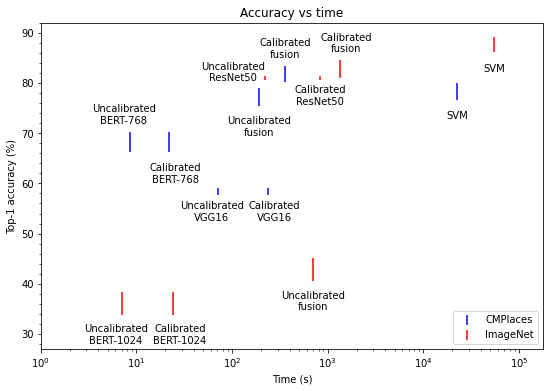

In [12]:
plt.figure(figsize=(9,6)) #(12,8)) #(9,6)) # (12,8)
#sns.set_theme()
plt.errorbar(x=cmplaces_times_used, y=cmplaces_with_uncertainty[:,0]*100, yerr=cmplaces_with_uncertainty[:,1]*100, fmt='.', ecolor='b', marker='')
plt.errorbar(x=imagenet_times_used, y=imagenet_with_uncertainty[:,0]*100, yerr=imagenet_with_uncertainty[:,1]*100, fmt='.', ecolor='r', marker='')
plt.title("Accuracy vs time")
plt.xlabel("Time (s)")
plt.ylabel("Top-1 accuracy (%)")
plt.xlim(1, 10**5.25)
plt.ylim(27,92)
plt.xscale('log')
plt.minorticks_on()
#plt.grid('minor')
plt.legend(["CMPlaces", "ImageNet"], loc="lower right")

# Text positions
pos_corrections = np.zeros((14,2))
pos_corrections[0] = [-0.05,2.75] #[-0.34,3.5]
pos_corrections[1] = [-0.05,-4.3]
pos_corrections[2] = [0,-5.8]
pos_corrections[3] = [+0.05,-6]
pos_corrections[4] = [+0.05,-4.3]
pos_corrections[5] = [0, 2.5]
pos_corrections[6] = [0, -4]
pos_corrections[7] = [-0.05, -6]
pos_corrections[8] = [-0.25, -0.5]
pos_corrections[9] = [0, -6]
pos_corrections[10] = [+0.05, -6]
pos_corrections[11] = [0,-4]
pos_corrections[12] = [+0.05, 2.5]
pos_corrections[13] = [0,-4]

pos_corrections[:,0] *= 12/9
pos_corrections[:,1] *= 8/6

# Put text in
for i, x, y, pos_cor, text in zip(range(len(times_concat)), times_concat, acc_concat, pos_corrections, model_names):
    dx, dy = pos_cor
    if len(text) > 12:
        t = text.split(' ')
        text = t[0] + '\n' + ' '.join(t[1:]) #+ '\n{:d}'.format(i)
    plt.text(10**(x+dx), y+dy, text, horizontalalignment='center')
    
plt.savefig("Accuracy vs time.svg")